# Notes


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from graphviz import Digraph
from variables import Variables as varsß

plt.style.use('../../notebook.mplstyle')

In [ ]:
df = pd.read_parquet("./data/us_births.parquet")

In [ ]:
df.to_csv("./data/us_births.zip", index=False)

In [71]:
births_year_df = df[[vars.YEAR, vars.P_DS_LB_NT, vars.P_DS_LB_WT]].groupby(vars.YEAR).sum()
births_year_df

,p_ds_lb_nt,p_ds_lb_wt
year,,
1989,5435.804076,4199.429334
1990,5716.629219,4391.877435
1991,5794.837984,4432.223334
1992,5888.002906,4407.190524
1993,5957.920280,4376.943639
1994,6063.337957,4360.531350
1995,6140.807701,4375.276452
1996,6279.330012,4280.466526
1997,6396.586350,4365.985796


In [72]:
recorded_year_df = df[[vars.YEAR, vars.DOWN_IND]].groupby(vars.YEAR).value_counts().unstack(fill_value=0).sort_index()
recorded_year_df

down_ind,0,1
year,,
1989,3333072,1954
1990,3640029,1983
1991,3615670,1791
1992,3623516,1816
1993,3741591,1763
1994,3742596,1706
1995,3623396,1640
1996,3810598,1677
1997,3797601,1663


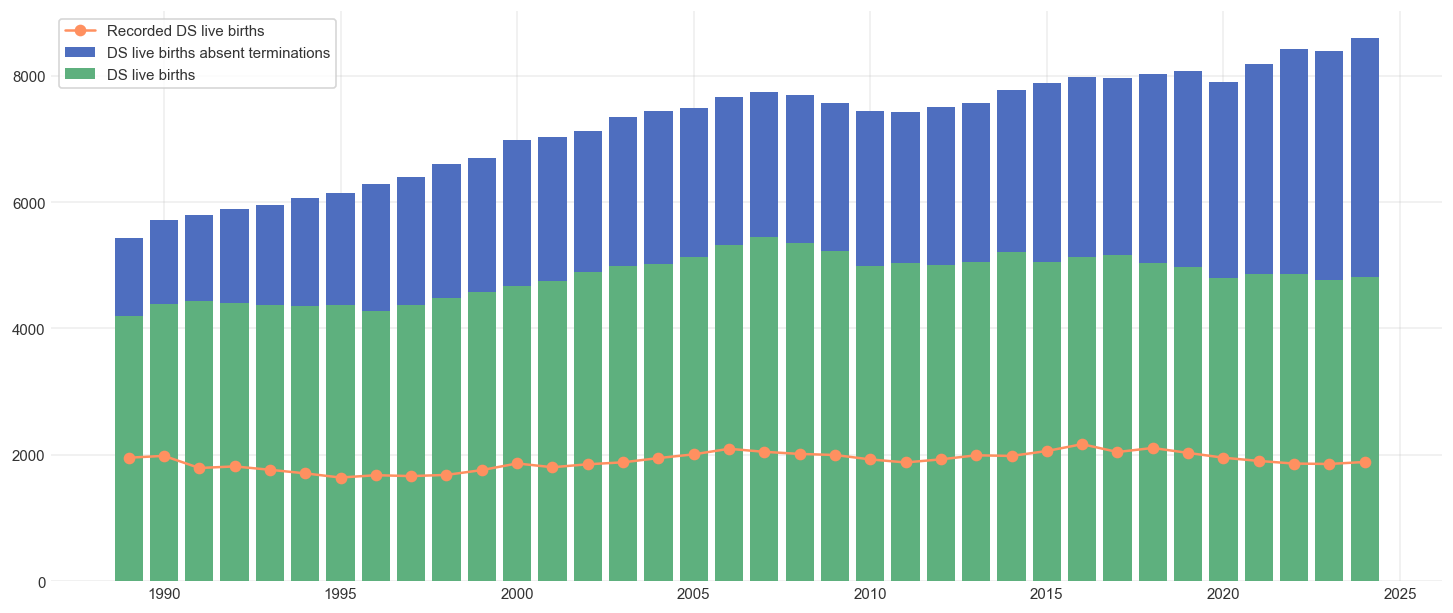

In [73]:
plt.figure(figsize=(12, 5))
plt.bar(births_year_df.index, births_year_df[vars.P_DS_LB_NT], label="DS live births absent terminations")
plt.bar(births_year_df.index, births_year_df[vars.P_DS_LB_WT], label="DS live births")
plt.plot(recorded_year_df.index, recorded_year_df[1], marker='o', color="#ff9060", label='Recorded DS live births')
plt.legend()

In [90]:
age_ds_df = df[[vars.MAGE_C, vars.P_DS_LB_NT]].groupby(vars.MAGE_C).describe()
age_ds_df

mage_c p_ds_lb_nt                                                        \
               count      mean           std       min       25%       50%   
0      10      135.0  0.000656  2.176480e-19  0.000656  0.000656  0.000656   
1      11      430.0  0.000657  0.000000e+00  0.000657  0.000657  0.000657   
2      12     5612.0  0.000657  1.084299e-19  0.000657  0.000657  0.000657   
3      13    36816.0  0.000658  1.084217e-19  0.000658  0.000658  0.000658   
4      14   186378.0  0.000659  1.084205e-19  0.000659  0.000659  0.000659   
5      15   597678.0  0.000660  0.000000e+00  0.000660  0.000660  0.000660   
6      16  1333835.0  0.000662  2.168405e-19  0.000662  0.000662  0.000662   
7      17  2338979.0  0.000664  2.168405e-19  0.000664  0.000664  0.000664   
8      18  3653735.0  0.000667  1.084202e-19  0.000667  0.000667  0.000667   
9      19  5132827.0  0.000672  2.168405e-19  0.000672  0.000672  0.000672   
10     20  5912309.0  0.000677  0.000000e+00  0.000677  0.000677  0.000677   
11     21  6323443.0  0.000684  2.168405e-19  0.000684  0.000684  0.000684   
12     22  6740707.0  0.000694  2.168405e-19  0.000694  0.000694  0.000694   
13     23  6974795.0  0.000706  2.168405e-19  0.000706  0.000706  0.000706   
14     24  7256499.0  0.000723  1.084202e-19  0.000723  0.000723  0.000723   
15     25  7584771.0  0.000746  1.084202e-19  0.000746  0.000746  0.000746   
16     26  7868116.0  0.000777  1.084202e-19  0.000777  0.000777  0.000777   
17     27  8111118.0  0.000819  1.084202e-19  0.000819  0.000819  0.000819   
18     28  8277083.0  0.000877  0.000000e+00  0.000877  0.000877  0.000877   
19     29  8329556.0  0.000956  5.421011e-19  0.000956  0.000956  0.000956   
20     30  8151583.0  0.001065  4.336809e-19  0.001065  0.001065  0.001065   
21     31  7801981.0  0.001219  2.168404e-19  0.001219  0.001219  0.001219   
22     32  7215210.0  0.001436  6.505213e-19  0.001436  0.001436  0.001436   
23     33  6509331.0  0.001747  2.168405e-19  0.001747  0.001747  0.001747   
24     34  5790455.0  0.002192  4.336809e-19  0.002192  0.002192  0.002192   
25     35  5006197.0  0.002830  4.336809e-19  0.002830  0.002830  0.002830   
26     36  4151358.0  0.003738  4.336809e-19  0.003738  0.003738  0.003738   
27     37  3308685.0  0.005003  0.000000e+00  0.005003  0.005003  0.005003   
28     38  2573892.0  0.006711  2.602086e-18  0.006711  0.006711  0.006711   
29     39  1959591.0  0.008920  0.000000e+00  0.008920  0.008920  0.008920   
30     40  1403350.0  0.011626  3.469448e-18  0.011626  0.011626  0.011626   
31     41   945624.0  0.014752  1.734724e-18  0.014752  0.014752  0.014752   
32     42   599937.0  0.018147  3.469450e-18  0.018147  0.018147  0.018147   
33     43   355291.0  0.021621  6.938904e-18  0.021621  0.021621  0.021621   
34     44   197084.0  0.024986  6.938912e-18  0.024986  0.024986  0.024986   
35     45   104167.0  0.028089  3.469464e-18  0.028089  0.028089  0.028089   
36     46    53757.0  0.030835  3.469479e-18  0.030835  0.030835  0.030835   
37     47    28668.0  0.033183  0.000000e+00  0.033183  0.033183  0.033183   
38     48    16025.0  0.035136  0.000000e+00  0.035136  0.035136  0.035136   
39     49    10242.0  0.036725  0.000000e+00  0.036725  0.036725  0.036725   
40     50    17146.0  0.037995  0.000000e+00  0.037995  0.037995  0.037995   
41     51      409.0  0.038996  6.947392e-18  0.038996  0.038996  0.038996   
42     52      220.0  0.039778  6.954718e-18  0.039778  0.039778  0.039778   
43     53      161.0  0.040383  6.960544e-18  0.040383  0.040383  0.040383   
44     54      103.0  0.040848  6.972825e-18  0.040848  0.040848  0.040848   

                        
         75%       max  
0   0.000656  0.000656  
1   0.000657  0.000657  
2   0.000657  0.000657  
3   0.000658  0.000658  
4   0.000659  0.000659  
5   0.000660  0.000660  
6   0.000662  0.000662  
7   0.000664  0.000664  
8   0.000667  0.000667  
9   0.000672  0.000672  
10  0.000677  0.000677  
11  0.00068

In [94]:
recorded_df = df[df[vars.DOWN_IND] == 1]

In [95]:
age_ds_recorded_df = recorded_df[[vars.MAGE_C, vars.P_DS_LB_NT]].groupby(vars.MAGE_C).describe()
age_ds_recorded_df

p_ds_lb_nt                                                        \
            count      mean           std       min       25%       50%   
mage_c                                                                    
12            2.0  0.000657  0.000000e+00  0.000657  0.000657  0.000657   
13            7.0  0.000658  0.000000e+00  0.000658  0.000658  0.000658   
14           39.0  0.000659  2.196751e-19  0.000659  0.000659  0.000659   
15          163.0  0.000660  1.087543e-19  0.000660  0.000660  0.000660   
16          364.0  0.000662  2.171389e-19  0.000662  0.000662  0.000662   
17          611.0  0.000664  2.170181e-19  0.000664  0.000664  0.000664   
18          948.0  0.000667  1.084774e-19  0.000667  0.000667  0.000667   
19         1389.0  0.000672  1.084593e-19  0.000672  0.000672  0.000672   
20         1586.0  0.000677  0.000000e+00  0.000677  0.000677  0.000677   
21         1682.0  0.000684  2.169049e-19  0.000684  0.000684  0.000684   
22         1742.0  0.000694  1.084514e-19  0.000694  0.000694  0.000694   
23         1827.0  0.000706  2.168998e-19  0.000706  0.000706  0.000706   
24         1849.0  0.000723  1.084495e-19  0.000723  0.000723  0.000723   
25         1922.0  0.000746  1.084484e-19  0.000746  0.000746  0.000746   
26         2020.0  0.000777  0.000000e+00  0.000777  0.000777  0.000777   
27         2234.0  0.000819  2.168890e-19  0.000819  0.000819  0.000819   
28         2327.0  0.000877  1.084435e-19  0.000877  0.000877  0.000877   
29         2588.0  0.000956  0.000000e+00  0.000956  0.000956  0.000956   
30         2588.0  0.001065  2.168823e-19  0.001065  0.001065  0.001065   
31         2764.0  0.001219  2.168797e-19  0.001219  0.001219  0.001219   
32         2944.0  0.001436  2.168773e-19  0.001436  0.001436  0.001436   
33         3091.0  0.001747  0.000000e+00  0.001747  0.001747  0.001747   
34         3274.0  0.002192  4.337471e-19  0.002192  0.002192  0.002192   
35         3416.0  0.002830  8.674887e-19  0.002830  0.002830  0.002830   
36         3544.0  0.003738  4.337421e-19  0.003738  0.003738  0.003738   
37         3651.0  0.005003  8.674805e-19  0.005003  0.005003  0.005003   
38         3629.0  0.006711  0.000000e+00  0.006711  0.006711  0.006711   
39         3575.0  0.008920  1.734966e-18  0.008920  0.008920  0.008920   
40         3326.0  0.011626  0.000000e+00  0.011626  0.011626  0.011626   
41         2912.0  0.014752  0.000000e+00  0.014752  0.014752  0.014752   
42         2348.0  0.018147  3.470186e-18  0.018147  0.018147  0.018147   
43         1746.0  0.021621  3.470441e-18  0.021621  0.021621  0.021621   
44         1182.0  0.024986  0.000000e+00  0.024986  0.024986  0.024986   
45          651.0  0.028089  3.472115e-18  0.028089  0.028089  0.028089   
46          333.0  0.030835  3.474668e-18  0.030835  0.030835  0.030835   
47          173.0  0.033183  0.000000e+00  0.033183  0.033183  0.033183   
48           42.0  0.035136  0.000000e+00  0.035136  0.035136  0.035136   
49           14.0  0.036725  0.000000e+00  0.036725  0.036725  0.036725   
50           10.0  0.037995  0.000000e+00  0.037995  0.037995  0.037995   
51            1.0  0.038996           NaN  0.038996  0.038996  0.038996   
53            1.0  0.040383           NaN  0.040383  0.040383  0.040383   

                            
             75%       max  
mage_c                      
12      0.000657  0.000657  
13      0.000658  0.000658  
14      0.000659  0.000659  
15      0.000660  0.000660  
16      0.000662  0.000662  
17      0.000664  0.000664  
18      0.000667  0.000667  
19      0.000672  0.000672  
20      0.000677  0.000677  
21      0.000684  0.000684  
22      0.000694  0.000694  
23      0.000706  0.000706  
24      0.000723  0.000723  
25      0.000746  0.000746  
26      0.000777  0.000777  
27      0.000819  0.000819  
28      0.000877  0.000877  
29      0.000956  0.000956  
30      0.001065  0.001065  
31      0.001219  0.001219  
32      0.001436  0.001436  
33      0.

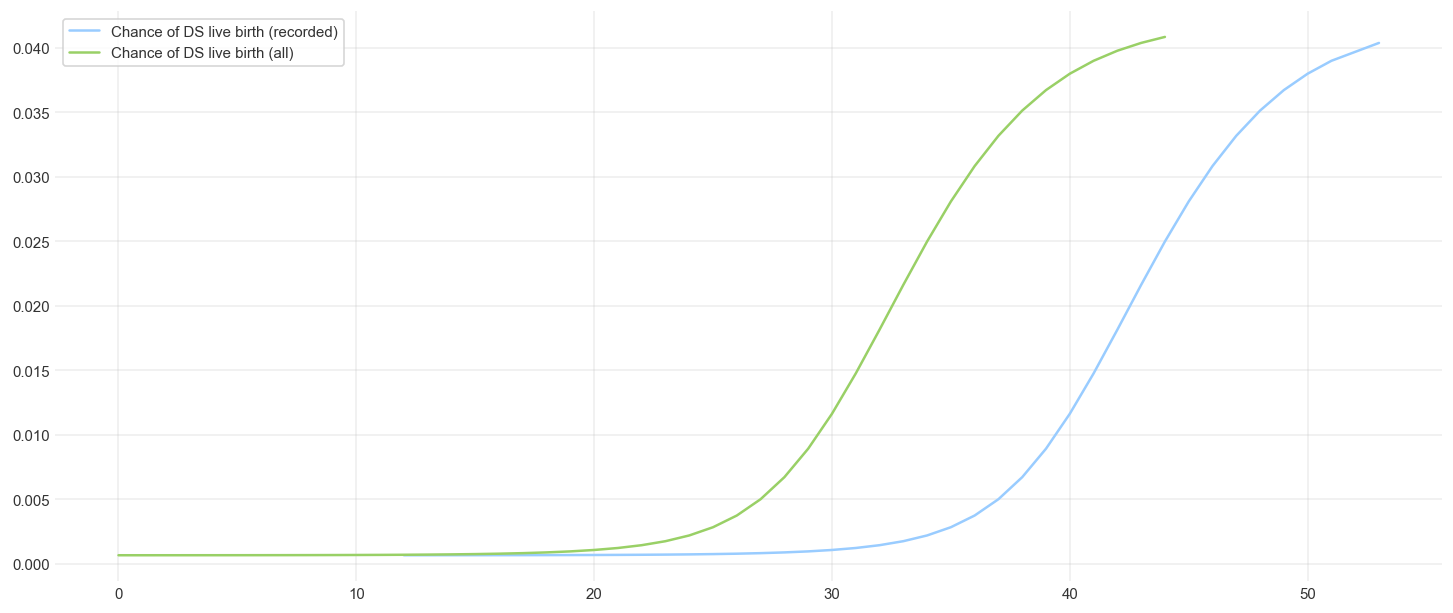

In [100]:
plt.figure(figsize=(12, 5))
plt.plot(age_ds_recorded_df.index, age_ds_recorded_df[(vars.P_DS_LB_NT, 'mean')], color="#99ccff", label="Chance of DS live birth (recorded)")
plt.plot(age_ds_df.index, age_ds_df[(vars.P_DS_LB_NT, 'mean')], color="#99d066", label="Chance of DS live birth (all)")
plt.legend()

<BarContainer object of 45 artists>

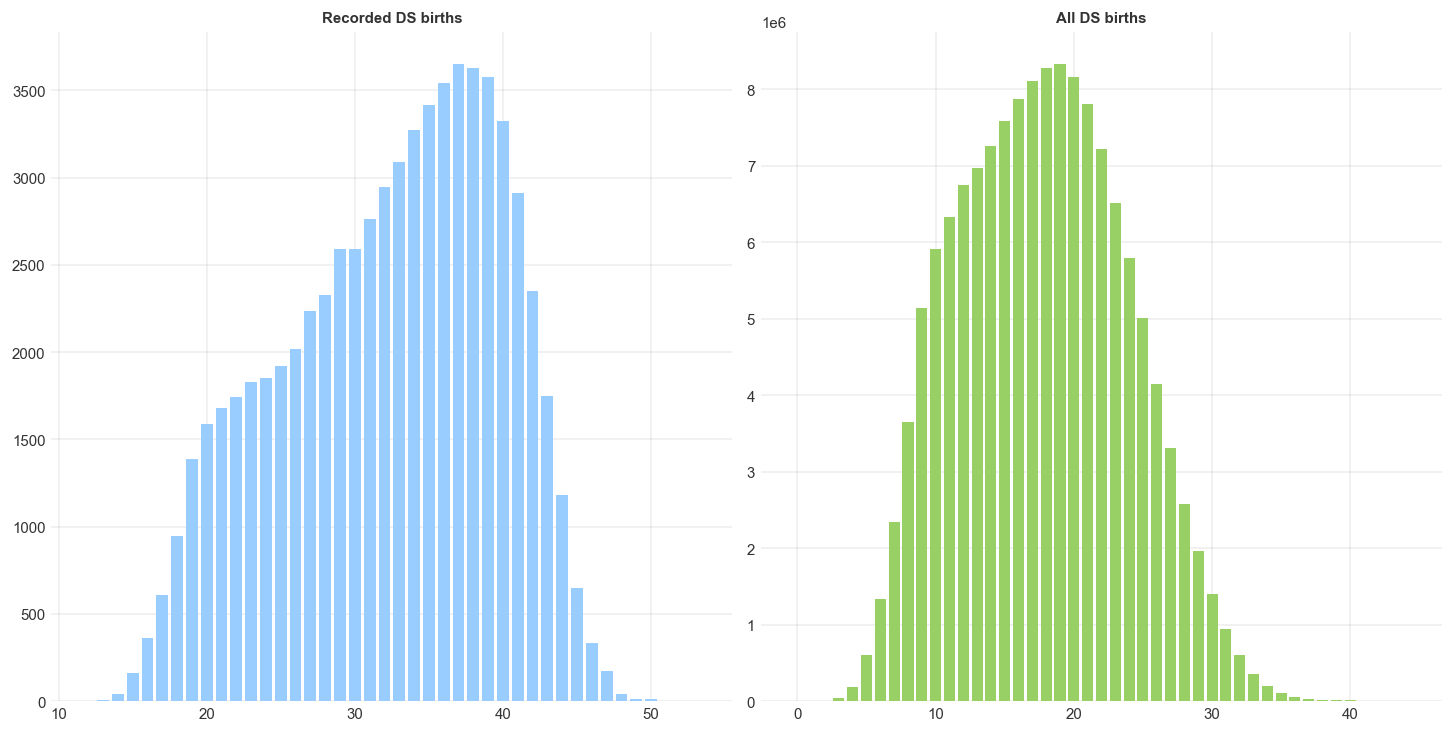

In [110]:
fig, axs = plt.subplots(1, 2, sharex=True, figsize=(12, 6))

axs[0].set_title("Recorded DS births")
axs[0].bar(age_ds_recorded_df.index, age_ds_recorded_df[(vars.P_DS_LB_NT, 'count')], color="#99ccff")

axs[1].set_title("DS births (all, estimated given maternal age)")
axs[1].bar(age_ds_df.index, age_ds_df[(vars.P_DS_LB_NT, 'count')], color="#99d066")

plt.tight_layout()
plt.show()

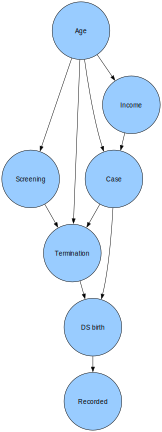

In [74]:
from graphviz import Digraph

dag = Digraph()

dag.attr(fontname="Helvetica")
dag.attr("node", fontname="Helvetica")
dag.attr("edge", fontname="Helvetica")

# set font sizes
dag.attr(size="8,6")
dag.attr("node", fontsize="14", style="filled", fillcolor="#99ccff")
dag.attr("edge", fontsize="12")

dag.attr(rankdir="TB", splines="spline")  # Top-to-bottom flow
dag.attr("node", shape="circle", fixedsize="true", width="1.75")

edges = [
    ('Age', 'Case'),
    ('Age', 'Screening'),
    ('Age', 'Termination'),
    ('Age', 'Income'),
    ('Income', 'Case'),
    ('Case', 'Termination'),
    ('Case', 'DS birth'),
    ('Screening', 'Termination'),
    ('Termination', 'DS birth'),
    ('DS birth', 'Recorded'),
]

for src, dst in edges:
    dag.edge(src, dst)

dag
